---
title: "PM"
format: 
  html: 
    toc: true
    css: styles.css
    echo: false
jupyter: python3
execute:
  echo: false # Hides all code globally
---

In [1]:
from util import Skim
from config import scenarioPath_OpenPath
from config import scenarioPath_EMME437

In [2]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# generate comparison
comparison = Skim.comparison(scenarioPath_OpenPath, scenarioPath_EMME437, 'PM', 'transit')

# Scatterplot Comparison of PM Peak for WALK PRM modes assignment

Scatterplot comparison of PM Peak total actual in-vehicle travel time by walk premium

Intercept: 0.0138
Slope: 0.9951
R² Score: 0.9988
RMSE: 0.9167


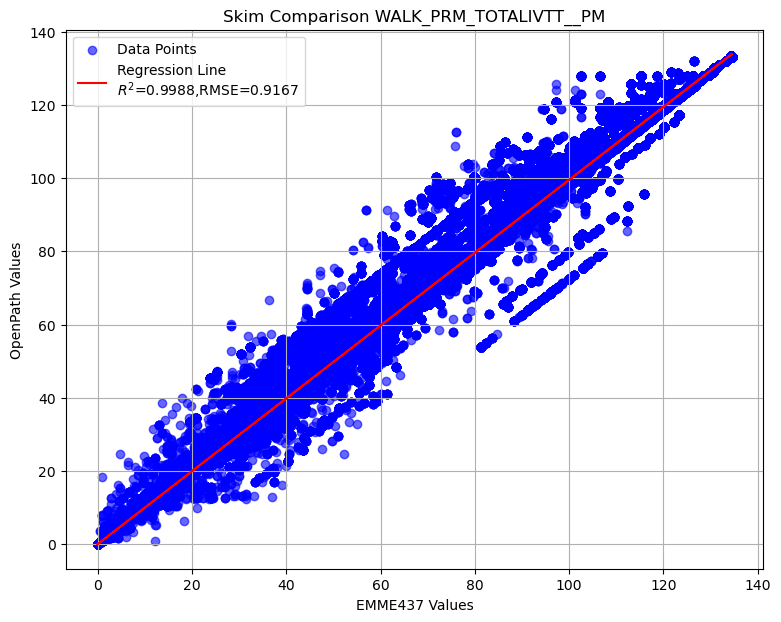

In [4]:
Skim.regression_scatter_plot('WALK_PRM_TOTALIVTT__PM', scenarioPath_OpenPath, scenarioPath_EMME437, 'PM', 'transit')

Scatterplot comparison of PM Peak actual in-vehicle travel time on LRT mode by walk premium

Intercept: 0.0040
Slope: 0.9952
R² Score: 0.9975
RMSE: 0.6113


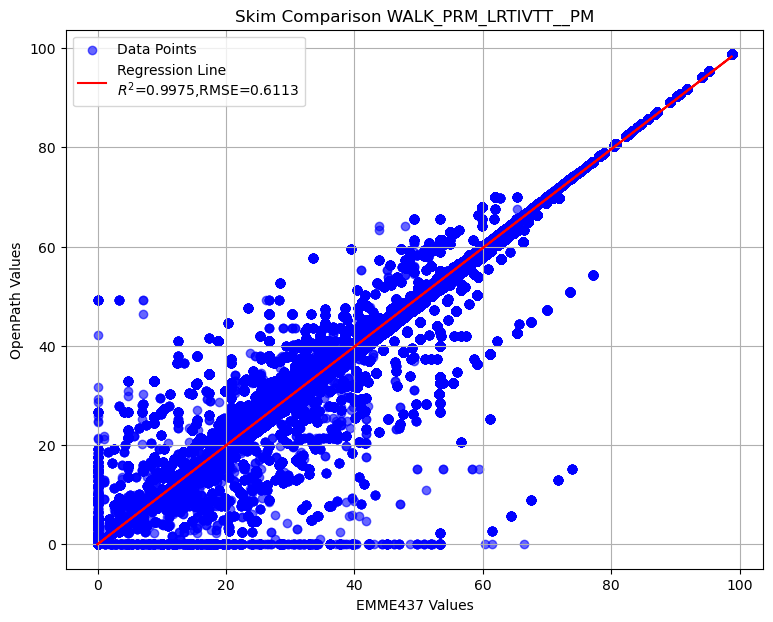

In [5]:
Skim.regression_scatter_plot('WALK_PRM_LRTIVTT__PM', scenarioPath_OpenPath, scenarioPath_EMME437, 'PM', 'transit')

Scatterplot comparison of PM Peak actual in-vehicle travel time on commuter rail mode by walk premium

Intercept: 0.0018
Slope: 0.9857
R² Score: 0.9895
RMSE: 0.8594


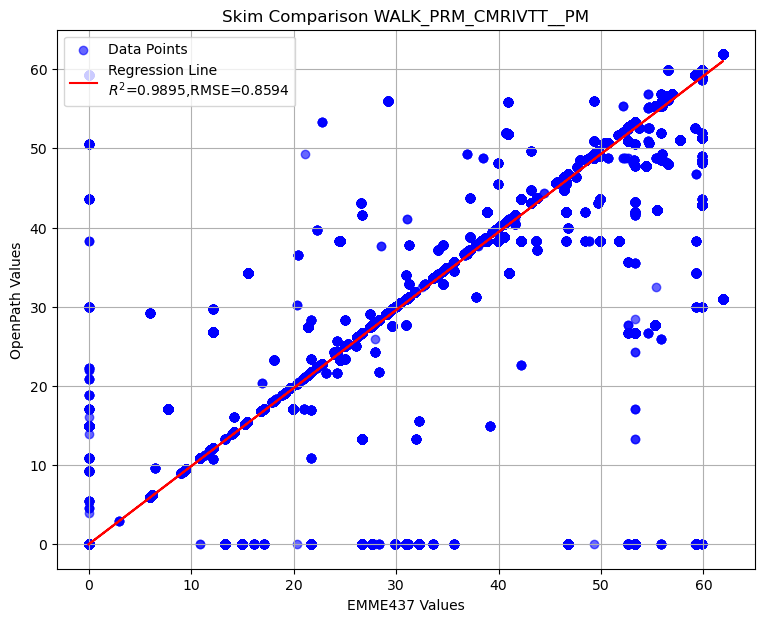

In [6]:
Skim.regression_scatter_plot('WALK_PRM_CMRIVTT__PM', scenarioPath_OpenPath, scenarioPath_EMME437, 'PM', 'transit')

Scatterplot comparison of PM Peak actual in-vehicle travel time on express bus mode by walk premium

Intercept: 0.0127
Slope: 0.9755
R² Score: 0.9896
RMSE: 0.6671


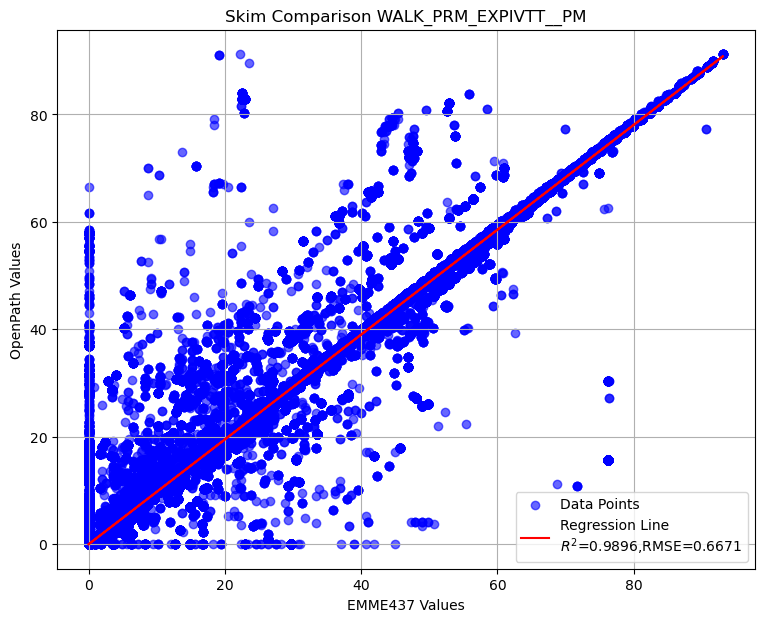

In [7]:
Skim.regression_scatter_plot('WALK_PRM_EXPIVTT__PM', scenarioPath_OpenPath, scenarioPath_EMME437, 'PM', 'transit')

Scatterplot comparison of PM Peak actual in-vehicle travel time on BRT mode by walk premium

Intercept: 0.0357
Slope: 0.9950
R² Score: 0.9920
RMSE: 1.3270


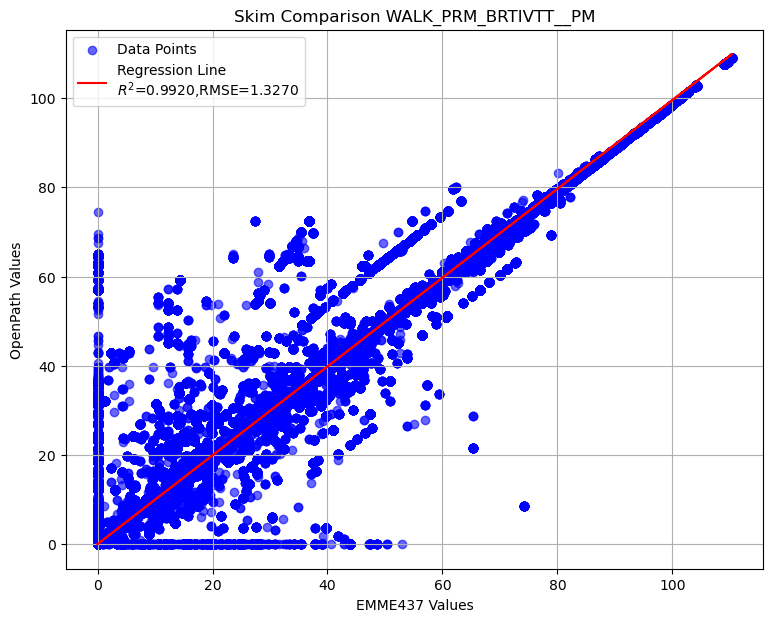

In [8]:
Skim.regression_scatter_plot('WALK_PRM_BRTIVTT__PM', scenarioPath_OpenPath, scenarioPath_EMME437, 'PM', 'transit')

Intercept: 0.0648
Slope: 0.9924
R² Score: 0.9999
RMSE: 0.7963


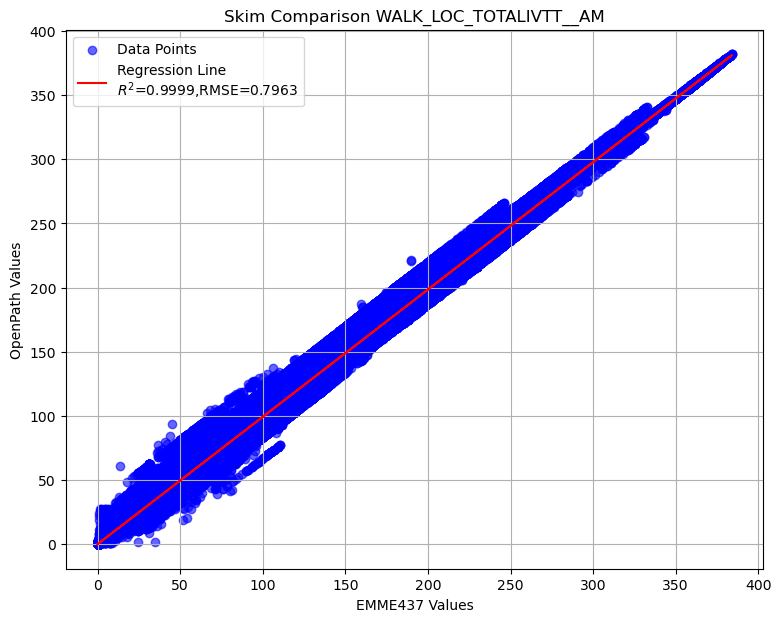

In [9]:
Skim.regression_scatter_plot('WALK_LOC_TOTALIVTT__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'transit')

Intercept: 0.1343
Slope: 0.9922
R² Score: 0.9965
RMSE: 2.8342


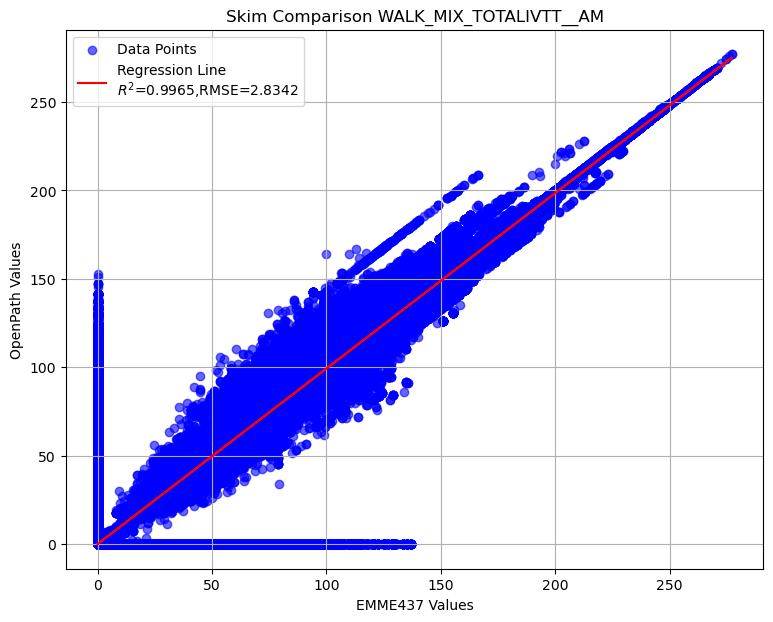

In [10]:
Skim.regression_scatter_plot('WALK_MIX_TOTALIVTT__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'transit')

# Summary of transit PM skim comparison (EMME OpenPath - EMME 4.3.7)

To display the top 5 rows of skim comparison (sort by WALK_PRM_TOTALIVTT__PM)

In [11]:
comparison.sort_values(by='WALK_PRM_TOTALIVTT__PM', ascending=False).head().round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__PM,WALK_PRM_LRTIVTT__PM,WALK_PRM_CMRIVTT__PM,WALK_PRM_EXPIVTT__PM,WALK_PRM_BRTIVTT__PM,WALK_LOC_TOTALIVTT__PM,WALK_MIX_TOTALIVTT__PM,WALK_PRM_XFERS__PM,WALK_LOC_XFERS__PM,WALK_MIX_XFERS__PM
51,2191,36.66,42.12,-52.63,8.86,38.31,-1.1,-0.31,0,0,0
51,2226,36.66,42.12,-52.63,8.86,38.31,-1.1,-0.31,0,0,0
1835,2849,34.18,0,0,71.99,-37.81,0,0,0.28,0,0
1835,2896,34.18,0,0,71.99,-37.81,0,0,0.28,0,0
1835,3093,34.18,0,0,71.99,-37.81,0,0,0.28,0,0


Below is the summary of select matrices difference in transit PM skim

In [12]:
comparison_excluded = comparison.drop(columns=['Origin', 'Destination'])
desc = comparison_excluded.describe().applymap(lambda x: f"{x:,.2f}").style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
)
desc

,WALK_PRM_TOTALIVTT__PM,WALK_PRM_LRTIVTT__PM,WALK_PRM_CMRIVTT__PM,WALK_PRM_EXPIVTT__PM,WALK_PRM_BRTIVTT__PM,WALK_LOC_TOTALIVTT__PM,WALK_MIX_TOTALIVTT__PM,WALK_PRM_XFERS__PM,WALK_LOC_XFERS__PM,WALK_MIX_XFERS__PM
count,"24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00"
mean,-0.05,-0.02,-0.02,-0.02,0.01,-0.48,-0.16,0.01,-0.00,0.00
std,0.93,0.61,0.87,0.69,1.33,0.82,2.53,0.09,0.03,0.06
min,-27.70,-66.45,-59.88,-60.93,-65.62,-60.45,-135.80,-2.00,-2.06,-3.10
25%,0.00,0.00,0.00,0.00,0.00,-1.07,-0.20,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,-0.12,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,36.66,49.24,59.22,71.99,74.46,49.35,164.89,2.68,3.43,3.50


Let's check the records with difference in WALK_PRM_LRTIVTT__PM greater than 45

In [15]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__PM']>45].round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__PM,WALK_PRM_LRTIVTT__PM,WALK_PRM_CMRIVTT__PM,WALK_PRM_EXPIVTT__PM,WALK_PRM_BRTIVTT__PM,WALK_LOC_TOTALIVTT__PM,WALK_MIX_TOTALIVTT__PM,WALK_PRM_XFERS__PM,WALK_LOC_XFERS__PM,WALK_MIX_XFERS__PM
50,2764,11.61,49.24,-52.63,-38.89,53.88,-1.41,0,0,0,0
51,2479,23.04,49.24,-59.22,0,33.01,-1.45,0,0,0,0
70,2762,14.91,49.24,-49.33,-38.89,53.88,-1.4,0,0,0,0
2391,57,24.19,49.24,-53.29,-26.31,54.54,-1.09,0,0,0,0
2395,53,17.79,45.96,-55.89,0,27.72,-1.21,0,-1.5,0,0
2571,53,25.13,49.24,-59.88,0,35.77,-1.14,0,0,0,0
2601,53,25.13,49.24,-59.88,0,35.77,-1.33,0,0,0,0
2616,53,25.13,49.24,-59.88,0,35.77,-1.14,0,0,0,0
2637,53,25.13,49.24,-59.88,0,35.77,-1.14,0,0,0,0
2640,53,25.13,49.24,-59.88,0,35.77,-1.14,0,0,0,0


Let's check the records with difference in WALK_PRM_LRTIVTT__PM less than -60

In [18]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__PM']<-60].round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__PM,WALK_PRM_LRTIVTT__PM,WALK_PRM_CMRIVTT__PM,WALK_PRM_EXPIVTT__PM,WALK_PRM_BRTIVTT__PM,WALK_LOC_TOTALIVTT__PM,WALK_MIX_TOTALIVTT__PM,WALK_PRM_XFERS__PM,WALK_LOC_XFERS__PM,WALK_MIX_XFERS__PM
1244,3240,-5.67,-60.27,0,54.6,0,-1.63,0,-1,0,0
1255,3240,-6.77,-61.38,0,54.6,0,-1.62,0,-1,0,0
1428,3575,-10.57,-66.45,0,55.88,0,-1.43,-1.3,0,0,0
